## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
import missingno as msno
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Libraries to be downloaded additionally-**
- missingno : conda install -c conda-forge missingno

            : pip install missingno

## Reading the data

In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Exploratory Data Analysis

 **Checking the shape of the data.**

In [4]:
data.shape

(541909, 8)

**First 5 rows of the data.**

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Last 5 rows of the data.**

In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Columns in the dataset.**

In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**The number of unique values in each column.**

In [9]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**Checking for null values.**

In [10]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**From the above cell, we can infer that the columns ['Description'] and ['CustomerID'] have null values.**

<Axes: >

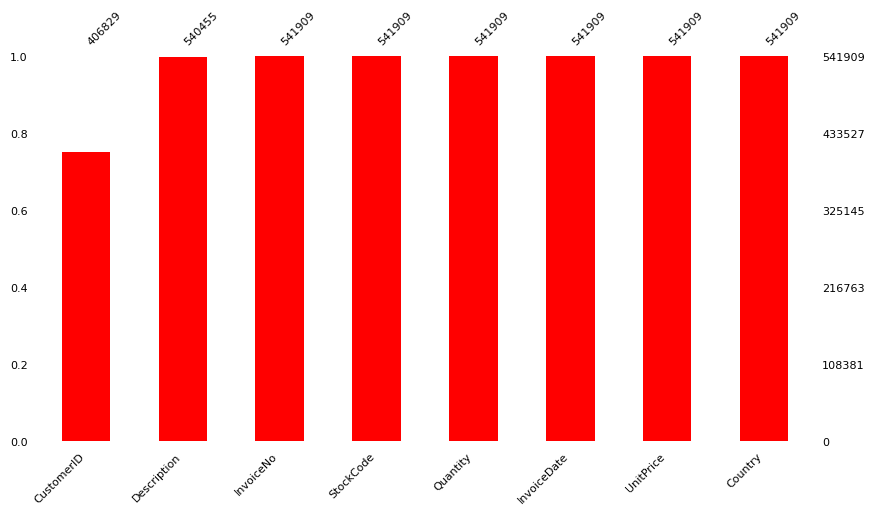

In [12]:
msno.bar(data, figsize=(10,5), sort="ascending", color='r', fontsize=8)

**As we can see the column containing the most number of null values is ['CustomerID'] and the next is ['Description'] column which differ with the total shape value that is 541909.**

**The presence of missing data and incorrect values within a dataset is common as the real world contains noisy data. These anomalies can significantly impact the accuracy and reliability of any subsequent analysis or modeling effort.**

**Dealing with the missing values.**
 - The column ['CustomerID'] has the most number of null values, we need to        think about either dropping the whole column or the rows instead.
 - We think that the column ['CustomerID'] is a crucial column and would be a      key column that would help identify a customer therefore we go with dropping    the null values instead. (Doesn't even constitute 5% of whole data).
 - Coming to the ['Description'] column we have comparitively very less values    so we proceed with dropping them as well.

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(406829, 8)

**As we can see we have dropped the rows having null values so we get the updated shape of our dataframe as (406829, 8).**

In [15]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


**From the above basic statistical details of our data we can infer that:**
  - ['Quantity'] column has its minimum value as a negative.
  - Also the ['UnitPrice'] column has a min of 0.
  
  **So we need to explore more in this columns.**

**Dealing with ['Quantity'] column.**

**Selecting the rows whose quantity is less than 0.**

In [16]:
data[data['Quantity']<0].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [17]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

In [18]:
data[data['InvoiceNo'].str.contains('C')].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

**As we can see the number of rows having the quantity less than 0 and the invoice number containing 'C' are same. This means we can assume that for the invoices that are cancelled the quantity has been populated as less than 0.**

**Therefore, we drop the values having 'C' in their invoice number.**

In [19]:
data = data[~data['InvoiceNo'].str.contains('C')]

In [20]:
data.shape

(397924, 8)

**Dealing with ['UnitPrice'] column.**

**Selecting the rows which have unitprice = 0.**

In [21]:
len(data[data['UnitPrice']==0])

40

**Dropping these 40 rows whose unitprice is equal to 0.**

In [22]:
data = data[data['UnitPrice']>0]

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [25]:
data.shape

(397884, 8)

**As we are done with dealing with missing values and the anomalies. Now we deep dive into the data analyzing more about the trends of the 'Retail Store' by answering some of these questions below.**

**1. What are the top 10 selling products?**

In [26]:
top10Products=data['Description'].value_counts().reset_index().rename(columns={'index':'productName','Description':'count'}).head(10)
top10Products

,productName,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


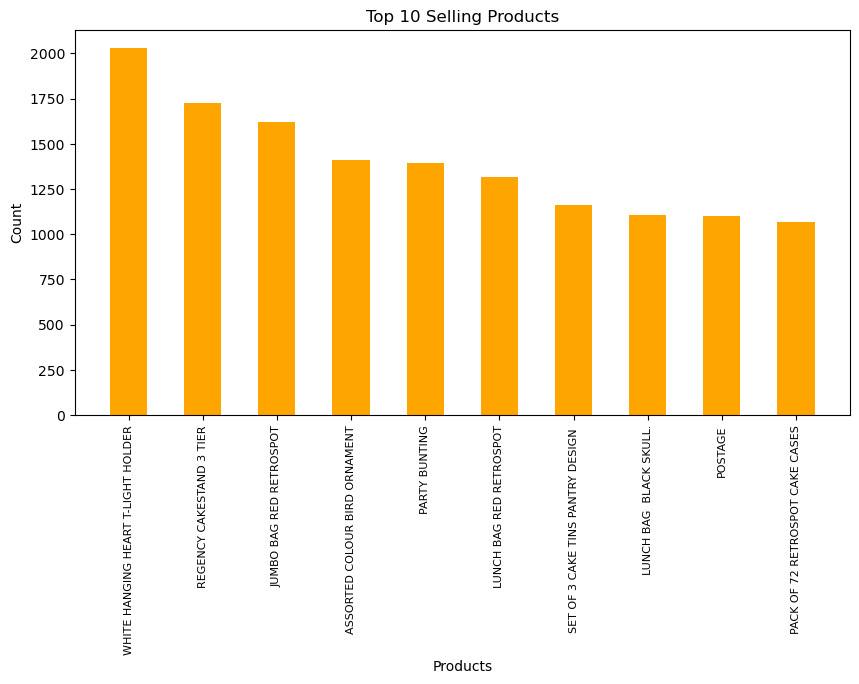

In [27]:
y = top10Products['count']
x = top10Products['productName']

plt.figure(figsize=(10,5))
plt.bar(x, y, width=0.5, color='orange')
plt.xlabel("Products")
plt.ylabel("Count")
plt.title("Top 10 Selling Products")
plt.xticks(rotation=90, size=8)
plt.show()

**2. What are the least selling items(bottom 10)?**

In [28]:
leastSellingProducts=data['Description'].value_counts().reset_index().rename(columns={'index':'productName','Description':'count'}).tail(10)
leastSellingProducts

,productName,count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Least 10 Selling Products')

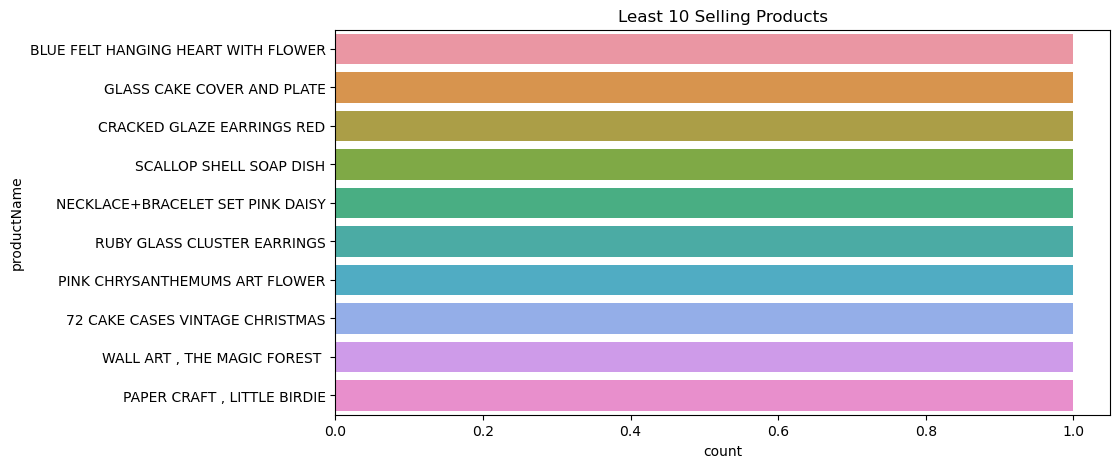

In [29]:
plt.figure(figsize=(10,5))
sns.set_palette("magma")
sns.barplot(x=leastSellingProducts['count'],y=leastSellingProducts['productName'])
plt.title('Least 10 Selling Products')

**3. Finding the top purchasing customers from different countries?**

In [30]:
topBuyingCountries=data['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'CustomersCount'})
topBuyingCountries

,Country,CustomersCount
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'Countries based on highest number of customers')

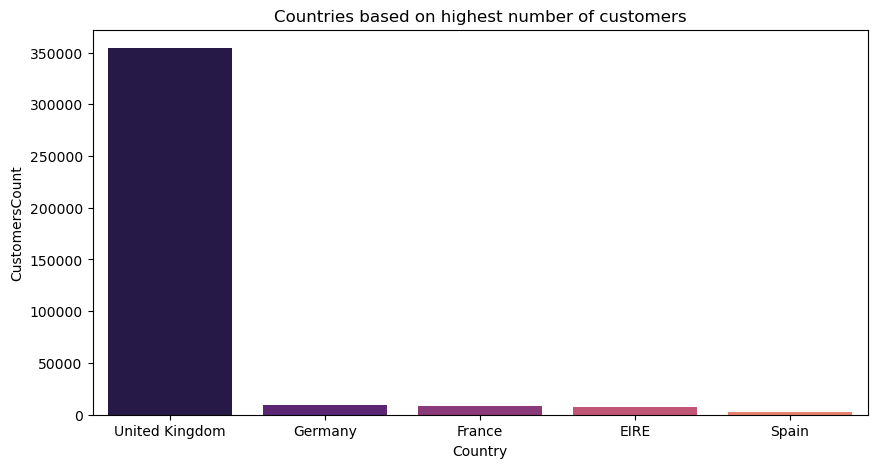

In [31]:
plt.figure(figsize=(10,5))
sns.set_palette("magma")
sns.barplot(x=topBuyingCountries['Country'].head(5),y=topBuyingCountries['CustomersCount'].head(5))
plt.title('Countries based on highest number of customers')

**4. Find the countries which has lowest customer sales?**

Text(0.5, 1.0, 'Countries based on lowest number of Customers Sales')

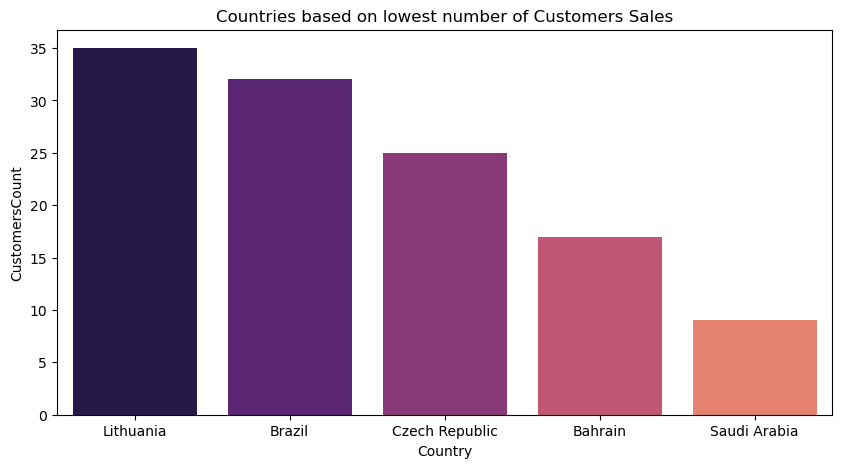

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=topBuyingCountries['Country'].tail(5),y=topBuyingCountries['CustomersCount'].tail(5))
plt.title('Countries based on lowest number of Customers Sales')

**Now that we are done with exploring the data and gaining some insights about the store and customers lets move on to the main objective of our problem statement that is to segment the customers.**

# Building the model!

# Understanding Customer Segmentation:

**Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes.The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.**

# Factors for 'Segmentation':

**Considering the exploration done on the data we can see that this data mostly contains customers from 'United Kingdom' that is the reason we cannot segment customers based on demography or geography therefore we choose the 'RFM' Model.**

# RFM Segmentation:

**A popular method for creating and allocating a score to each client is RFM analysis.**

**RFM stands for 'Recency', 'Frequency' and 'Monetary'.**

**Recency: How recently a customer has made a purchase. It measures the time              elapsed since the last customer transaction.**

**Frequency:  How often a customer makes purchases within a specific period. It               counts the total number of transactions or visits made by a                     customer.**

**Monetary: The total amount a customer has spent within a certain period. It               reflects the customer's purchasing power and contribution to                   revenue.**

**Calculating 'Recency'**

**First we would be determining the maximum date present in the 'InvoiceDate' column which signifies the most recent transaction date across the entire dataset.**

**Then, we identify the most recent purchase date for each indiviudal customer by grouping the data by 'CustomerID' and extracting the maximum of 'InvoiceDate' associated with each customer.**

**Therefore, we get the number of days between each customer's most recent purchase and the dataset's overall last transaction date.**

In [33]:
max_Date = data['InvoiceDate'].max()
recency_data = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_data['Recency'] = (max_Date - recency_data['InvoiceDate']).dt.days
recency_data.drop('InvoiceDate', axis=1, inplace=True)
recency_data

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


**Calculating 'Frequency'.**

**We group the data by 'CustomerID' and the corresponding 'Frequency' of transactions which results in total number of transactions made by a customer.**

In [34]:
frequency_data = data.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,756


**Calculating 'Monetary'.**

**Summarizing customer transaction data by calculating the total monetary value of purchases made by each unique customer.**

In [35]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
monetary_data = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


**Combining all the 'RFM' metrics into a single dataframe.**

In [36]:
rfm_data = pd.merge(recency_data, frequency_data, on='CustomerID')
rfm_data = pd.merge(rfm_data, monetary_data, on='CustomerID')
rfm_data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4333,18280.0,277,10,180.60
4334,18281.0,180,7,80.82
4335,18282.0,7,12,178.05
4336,18283.0,3,756,2094.88


**Below is the 'Pair Plot' which displays scatterplots for pairs of variables and histograms for indiviudal variables. In the context of 'RFM' data we can visualize the interrelationships among Recency, Frequency and Monetary metrics in the dataset!**

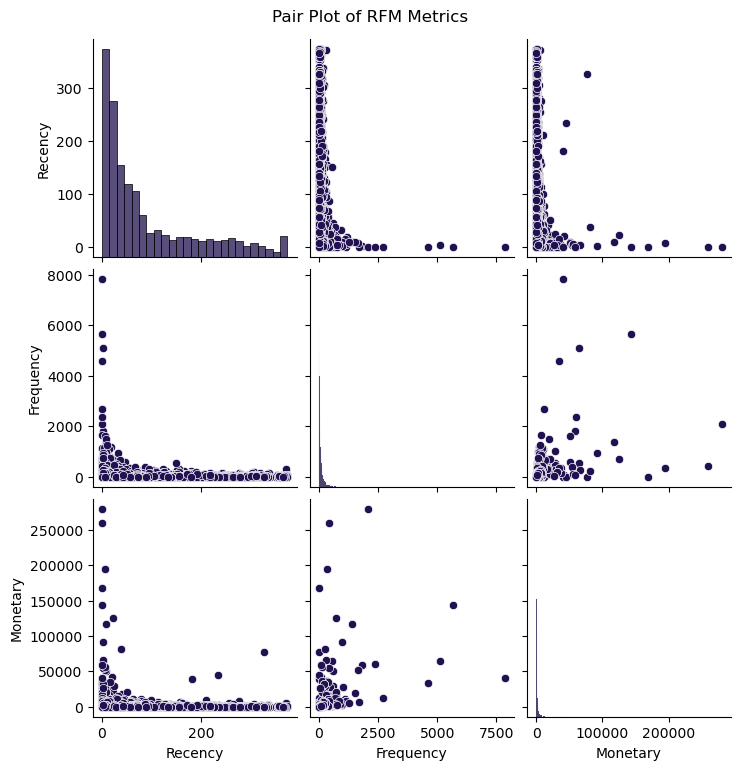

In [37]:
sns.pairplot(rfm_data[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('Pair Plot of RFM Metrics', y=1.02)
plt.show()

**ANALYZING DISTRIBUTION.**

**As we can see there is a lack of symmetry in the distribution above.**

**Observing the distribution we can infer that it a 'Positive Skew' indicating a bulk of data on the left with a tail to its right.**

**ADDRESSING SKEWNESS**

**We would be addressing the skewness using 'Cube Root Transformation'.**

**'Cube Root Transformation' is one of the technique to adress 'Positive Skew' data and is a relatively simple and straightforward method. Also a less aggressive compared to 'Log Transformation'.**

In [38]:
cbrtTransformedData = rfm_data
cbrtTransformedData

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4333,18280.0,277,10,180.60
4334,18281.0,180,7,80.82
4335,18282.0,7,12,178.05
4336,18283.0,3,756,2094.88


In [39]:
cbrtTransformedData = rfm_data[['Recency', 'Frequency', 'Monetary']].apply(np.cbrt, axis = 1)
cbrtTransformedData

,Recency,Frequency,Monetary
0,6.875344,1.000000,42.576995
1,1.000000,5.667051,16.273929
2,4.198336,3.141381,12.158183
3,2.620741,4.179339,12.068017
4,6.760614,2.571282,6.941001
...,...,...,...
4333,6.518684,2.154435,5.652483
4334,5.646216,1.912931,4.323541
4335,1.912931,2.289428,5.625753
4336,1.442250,9.109767,12.795376


In [40]:
cbrtTransformedData = pd.concat([rfm_data['CustomerID'], cbrtTransformedData], axis=1)
cbrtTransformedData

,CustomerID,Recency,Frequency,Monetary
0,12346.0,6.875344,1.000000,42.576995
1,12347.0,1.000000,5.667051,16.273929
2,12348.0,4.198336,3.141381,12.158183
3,12349.0,2.620741,4.179339,12.068017
4,12350.0,6.760614,2.571282,6.941001
...,...,...,...,...
4333,18280.0,6.518684,2.154435,5.652483
4334,18281.0,5.646216,1.912931,4.323541
4335,18282.0,1.912931,2.289428,5.625753
4336,18283.0,1.442250,9.109767,12.795376


**Analyzing Distribution after addressing 'Skewness'.**

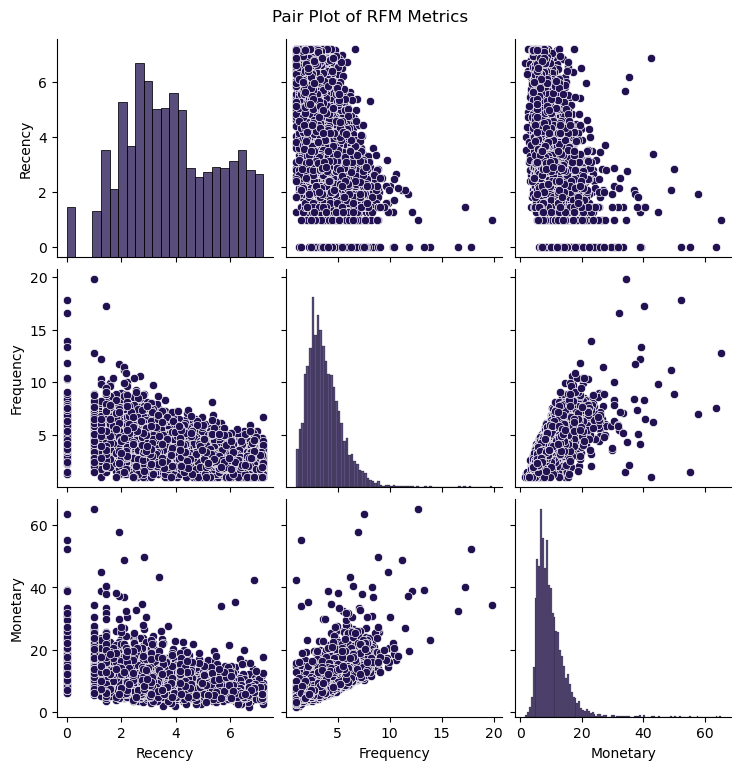

In [41]:
sns.pairplot(cbrtTransformedData[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('Pair Plot of RFM Metrics', y=1.02)
plt.show()

**Now since, we have calculated the 'Recency', 'Frequency' and 'Monetary'. We will be calculating the 'RFM Score'.**

**We will be assigning scores to each customer by dividing each RFM Metric into quartiles.**

**RFM SCORE CALCULATION**

In [42]:
quartiles = cbrtTransformedData.quantile(q=[0.25,0.5,0.75])
quartiles = quartiles.to_dict()
quartiles

{'CustomerID': {0.25: 13813.25, 0.5: 15299.5, 0.75: 16778.75},
 'Recency': {0.25: 2.571281590658235,
  0.5: 3.684031498640387,
  0.75: 5.204827863394201},
 'Frequency': {0.25: 2.571281590658235,
  0.5: 3.4482172403827303,
  0.75: 4.641588833612779},
 'Monetary': {0.25: 6.749035064759053,
  0.5: 8.769821727167752,
  0.75: 11.844617052197167}}

**Now we wii be defining functions called 'recencyScore' and 'freqNMonetaryScore' which will be assigning the scores to customers based on their RFM Metrics.**

In [43]:
def recencyScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def freqNMonetaryScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

**- Score 1 - Value is less than 25th percentile.**

**- Score 2 - Value is greater than 25th percentile but less than or equal               to the 50th percentile.**

**- Score 3 - Value is greater than 50th percentile but less than or equal to                 the 75th percentile.**

**- Score 4 - Value is greater than the 75th percentile.**

**Combining the results into one dataframe.**

In [44]:
cbrtTransformedData['R'] = cbrtTransformedData['Recency'].apply(recencyScore, args=('Recency',quartiles,))
cbrtTransformedData['F'] = cbrtTransformedData['Frequency'].apply(freqNMonetaryScore, args=('Frequency',quartiles,))
cbrtTransformedData['M'] = cbrtTransformedData['Monetary'].apply(freqNMonetaryScore, args=('Monetary',quartiles,))
cbrtTransformedData.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,6.875344,1.000000,42.576995,4,4,1
1,12347.0,1.000000,5.667051,16.273929,1,1,1
2,12348.0,4.198336,3.141381,12.158183,3,3,1
3,12349.0,2.620741,4.179339,12.068017,2,2,1
4,12350.0,6.760614,2.571282,6.941001,4,4,3


**As we can see that we have assigned scores considering each segment for a customer. Now, we will be combining the scores to get the total 'RFM Score'.**

In [45]:
cbrtTransformedData['RFMScore'] = cbrtTransformedData[['R', 'F', 'M']].sum(axis = 1)
cbrtTransformedData.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore
0,12346.0,6.875344,1.000000,42.576995,4,4,1,9
1,12347.0,1.000000,5.667051,16.273929,1,1,1,3
2,12348.0,4.198336,3.141381,12.158183,3,3,1,7
3,12349.0,2.620741,4.179339,12.068017,2,2,1,5
4,12350.0,6.760614,2.571282,6.941001,4,4,3,11


**Visualizing the proportion of customers** 

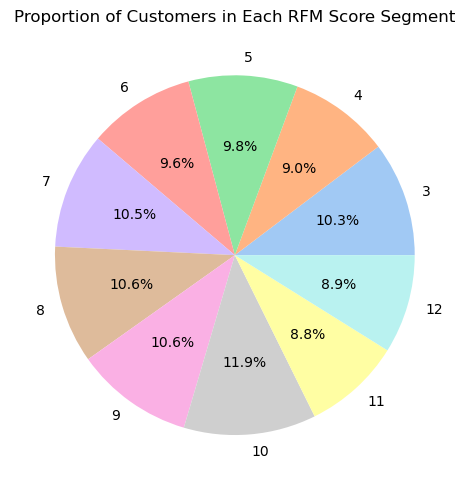

In [46]:
score_counts = cbrtTransformedData['RFMScore'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
score_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Proportion of Customers in Each RFM Score Segment')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Multivariate Analysis / Feature Selection

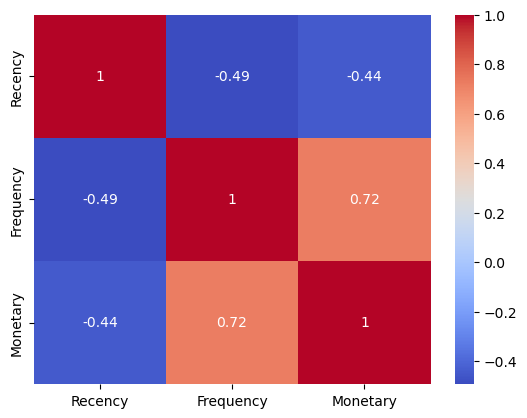

<Figure size 1000x500 with 0 Axes>

In [47]:
sns.heatmap(cbrtTransformedData[['Recency','Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(10,5))
plt.show()

**From the above 'HeatMap'(analysis between multiple variables) we can see a strong positive correlation between 'Frequency' and 'Monetary' (0.72). Indicating that customers who make more frequent purchases also tend to spend more money.**
**This suggests that combining these two metrics can capture a significant portion of customer behavior.**
**The goal of the segmentation project is to enhance customer satisfaction and increase profitability. Frequency and Monetary metrics directly relate to the financial impact of customers on the business, making them relevant for strategic decisions.**
**So this the reason we chose frequency and monetary for our segmentation.**

# Clustering

**As we know that 'K-Means Clustering' is a popular choice for customer segmentation. Even we will be proceeding the K-Means algorithm as it is computationally efficient and straightforward. Also 'K-Means' produces easily interpretable results especially when working with numeric data such as RFM metrics.**

**Feature selection and standardizing the data.**

**We will be selecting 'Monetary' and 'Frequency' according to the Multivariate Analysis above and our prime features for clustering customers into segements because it indicates that customers who make more frequent purchases tend to spend more.**
**Scaling the features.**

In [48]:
features = ['Monetary', 'Frequency']
val_features = cbrtTransformedData[features].values
scaling_features = StandardScaler()
scaledVal = scaling_features.fit_transform(val_features)
X = scaledVal

**Elbow Method**

**Elbow Method is a technique used in clustering analysis to determine the optimum number of clusters.**

In [49]:
wcss = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_

C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

**Plotting the elbow graph.**

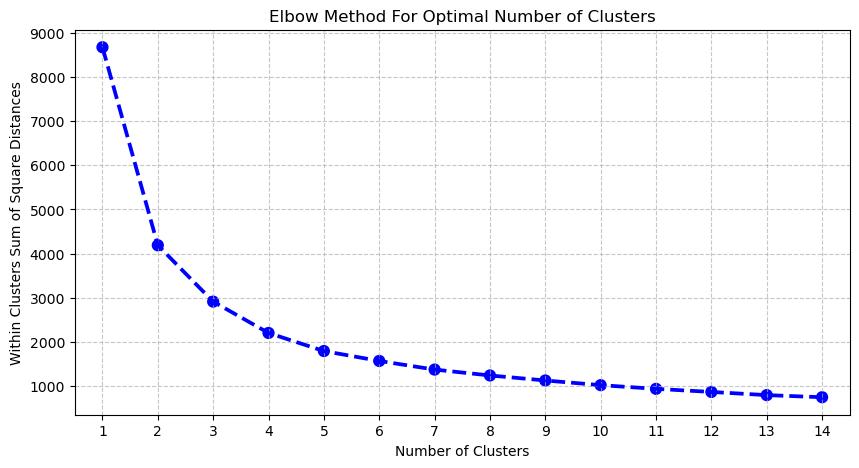

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()),color='b', markers="o", linestyles="--")
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Square Distances')
plt.title(u'Elbow Method For Optimal Number of Clusters')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**As we can see that this graph displays a discernible "elbow-like" bend where the rate of decrease in the within cluster sum of squares starts to slow down notably. We can see that bend at '2' or '3'. Therefore first we would be assuming that the optimum number of clusters are '2'.**

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels= kmeans.predict(X)

C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


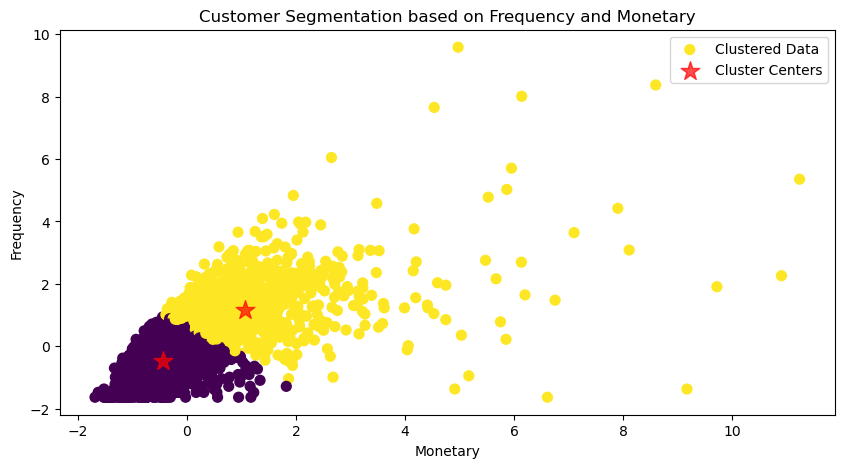

In [52]:
plt.figure(figsize=(10,5))
plt.title('Customer Segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Clustered Data')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Cluster Centers', marker='*')
plt.legend()

plt.show()

**Calculating the 'Silhouette Score' for 2 clusters.**

In [53]:
kmeans_Silhouette = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=42)
label1 = kmeans_Silhouette.fit_predict(X)
silhouetteScore = silhouette_score(X, label1)
print("Silhouette Score for 2 Clusters:", silhouetteScore)

C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 Clusters: 0.5405044175513396


**Now assuming the optimum number of clusters as '3'.**

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels= kmeans.predict(X)

C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


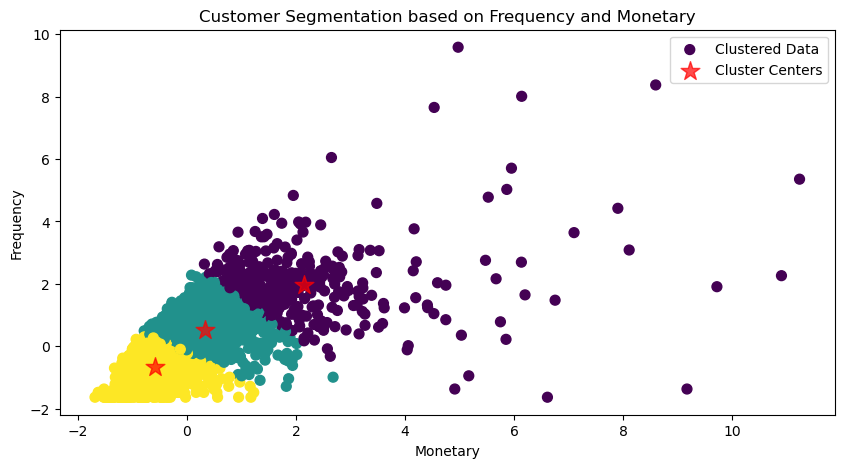

In [55]:
plt.figure(figsize=(10,5))
plt.title('Customer Segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Clustered Data')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Cluster Centers', marker='*')
plt.legend()

plt.show()

**Calculating the 'Silhouette Score' for 3 clusters.**

In [56]:
kmeans_Silhouette = KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=42)
label1 = kmeans_Silhouette.fit_predict(X)
silhouetteScore = silhouette_score(X, label1)
print("Silhouette Score for 3 Clusters:", silhouetteScore)

C:\Users\rtpn2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 Clusters: 0.4668921102506352


# Validation

**The silhouette score is a validation metric used to evaluate the quality of the clusters created by clustering algorithms such as 'K-Means', 'DBSCAN' etc.**
**This provides an indication of how-well separated the clusters are how similar the data points are within the clusters.**

**Interpretation - A score closer to 1 indicates well distinguished clusters.**

**-Silhouette Score for 2 Clusters: 0.5405044175513396.**

**-Silhouette Score for 3 Clusters: 0.4668921102506352.**

**Therfore we can say that the optimum number of clusters are '2'.**

# Conclusion/Summary

**-Customer segmentation serves as a pivotal strategy to better comprehend and cater to the diverse needs and behaviors of consumers. By employing machine learning techniques to segment online retail customers based on their purchasing patterns and characteristics, this project aims to derive actionable insights for personalized marketing approaches and enhanced customer satisfaction.**

**-The primary objective is to unravel trends within the retail data, particularly product preferences over a specific timeframe.**

**-Understanding these trends and clustering customers enables the identification of distinct consumer groups, providing a competitive advantage and fostering tailored marketing initiatives.**

**-Segmentation isn't just about dividing customers into groups; it's about gaining a comprehensive understanding of their preferences, challenges, and buying behaviors. This detailed knowledge facilitates the creation of targeted content and strategies that precisely address the unique needs of each segment. Ultimately, through strategic segmentation, the goal is to elevate customer satisfaction, drive profitability, and gain a competitive edge in the online retail landscape.**

**-We found enhanced understanding of the customer base by gaining insights of customer purchases through "Exploratory Data Analysis".**

**-From the cluster analysis segmentation we can infer that the importance of fostering customer loyalty and engagement for maximizing revenue.**
**Also, we identified two distinct customer segments:
    Cluster 1 -  Customers with lower spending frequency and monetary value.
    Cluster 2 -  Customers with higher spending frequency and monetary value.**

**-In summary, segmenting customers based on their spending behavior allows for tailored strategies, fostering stronger customer relationships, increased satisfaction, and improved business performance within the online retail landscape.**